# Exploratory Data Analysis

## All the Lifecycle in a Data Science Projects
1. Exploratory Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

In [56]:
# EDA phase - understanding data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# This is the default and will render images as PNGs
%matplotlib inline              

# Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [6]:
dataset=pd.read_csv('/Users/raaghav/Desktop/Data_Analyst/Projects/Advanced-House-Price-Prediction/Data/train.csv')

# print shape of dataset with rows and columns
print(dataset.shape)

(1460, 81)


In [7]:
# print the top5 records
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Exploratory In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)

## Missing Values

In [8]:
# Here we will check the percentage of nan values present in each feature

# 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

# 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean() * 100, 4),  ' % missing values')

LotFrontage 17.7397  % missing values
Alley 93.7671  % missing values
MasVnrType 59.726  % missing values
MasVnrArea 0.5479  % missing values
BsmtQual 2.5342  % missing values
BsmtCond 2.5342  % missing values
BsmtExposure 2.6027  % missing values
BsmtFinType1 2.5342  % missing values
BsmtFinType2 2.6027  % missing values
FireplaceQu 47.2603  % missing values
GarageType 5.5479  % missing values
GarageYrBlt 5.5479  % missing values
GarageFinish 5.5479  % missing values
GarageQual 5.5479  % missing values
GarageCond 5.5479  % missing values
PoolQC 99.5205  % missing values
Fence 80.7534  % missing values
MiscFeature 96.3014  % missing values


### Since they are many missing values, we need to find the relationship between missing values and Sales Price

Let's plot some diagram for this relationship


/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


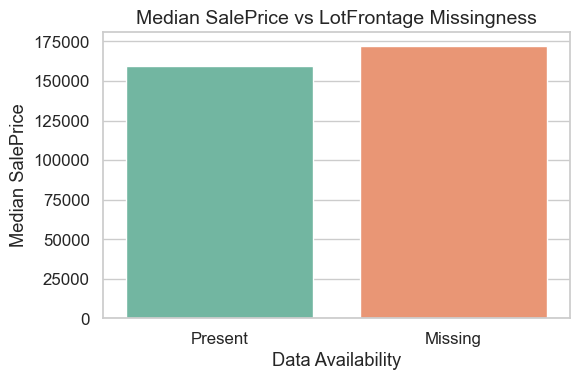

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


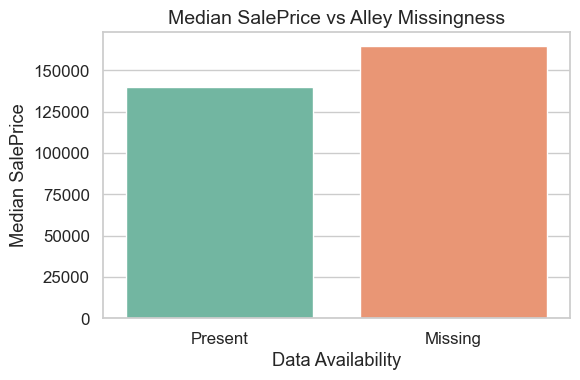

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


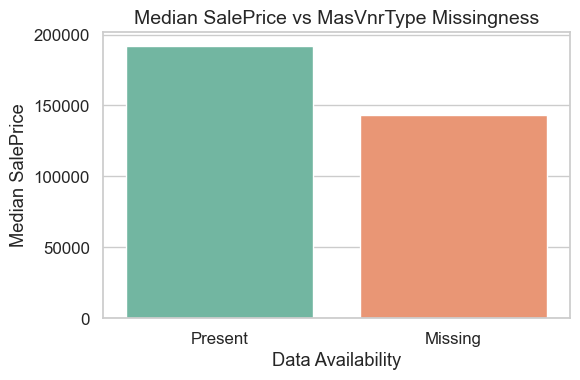

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


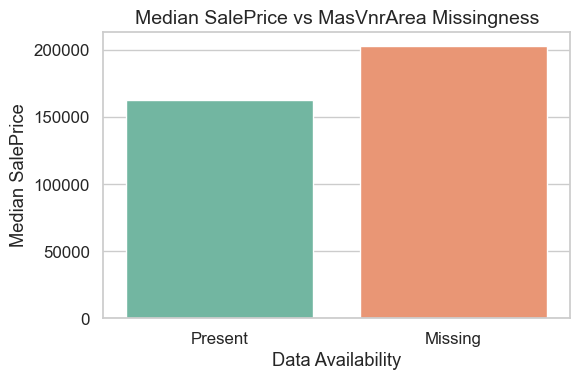

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


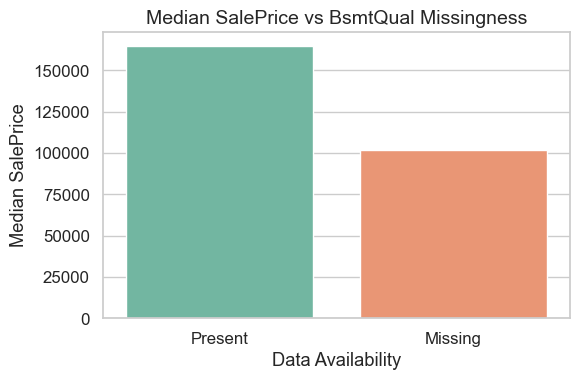

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


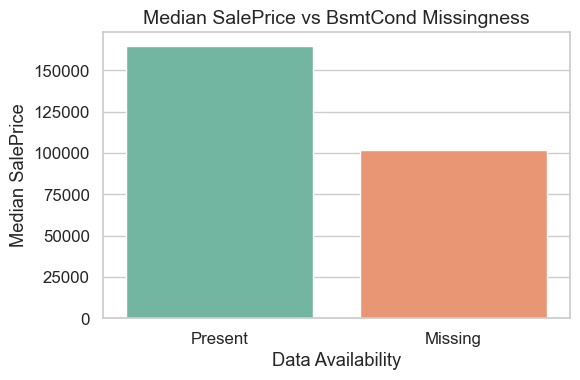

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


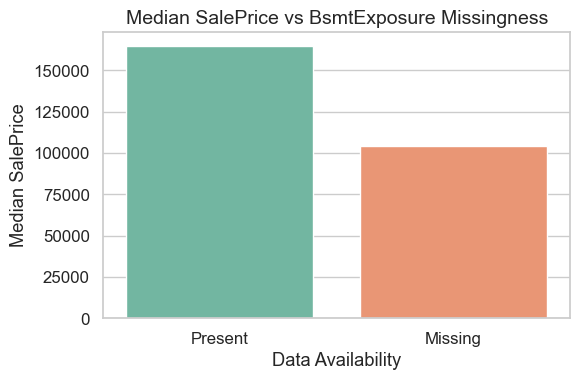

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


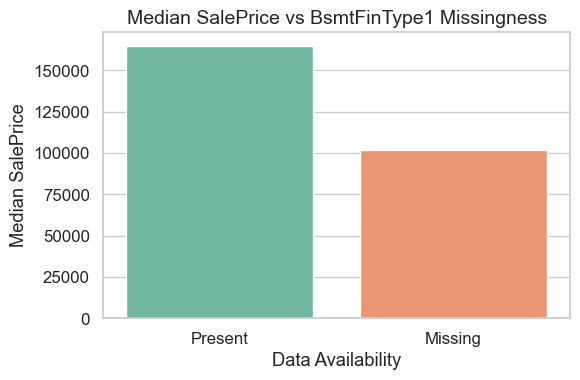

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


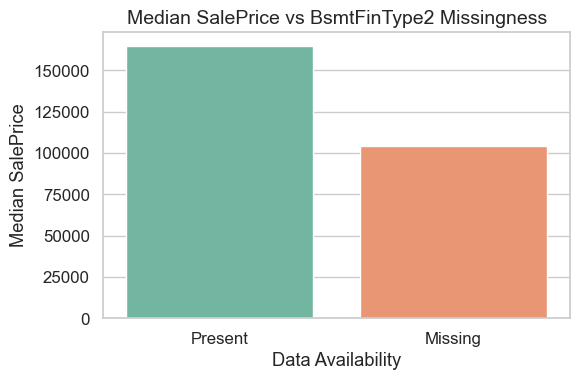

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


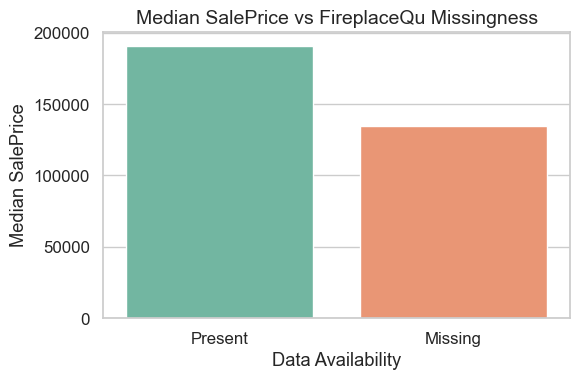

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


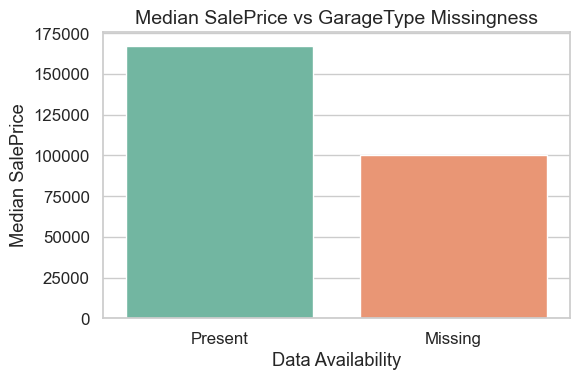

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


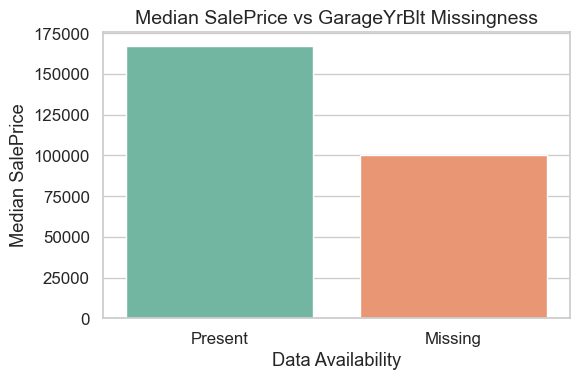

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


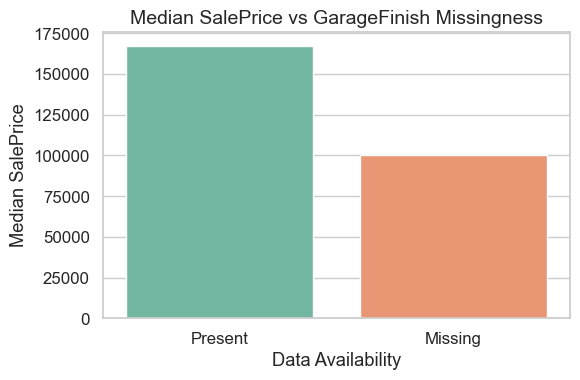

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


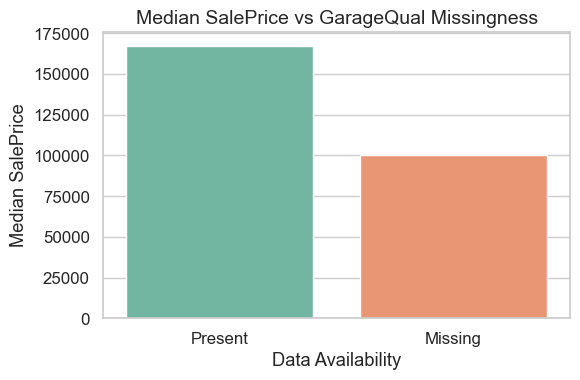

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


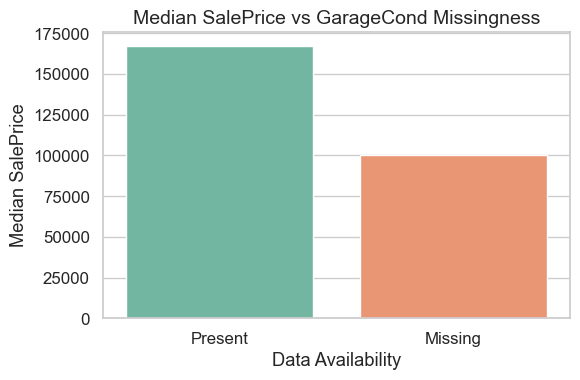

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


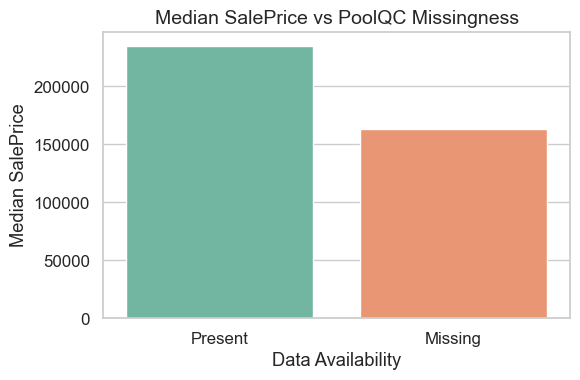

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


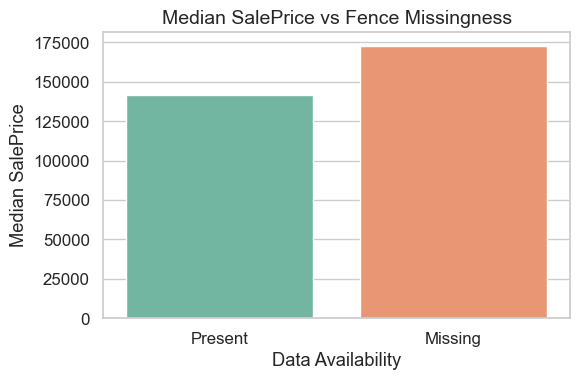

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1322685882.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')


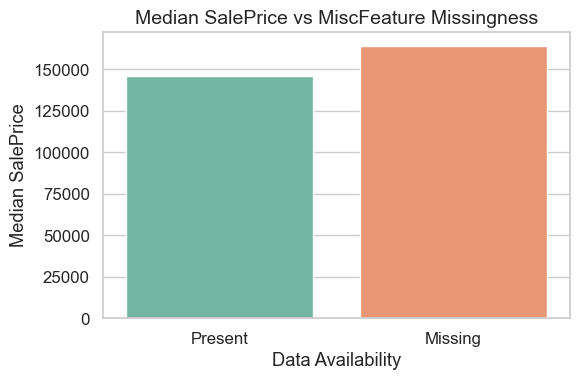

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="pastel", font_scale=1.1)  # Aesthetic styling

for feature in features_with_na:
    data = dataset.copy()
    
    # Create an indicator variable for missing values
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # Create a temporary DataFrame with median SalePrice by missing indicator
    grouped = data.groupby(feature)['SalePrice'].median().reset_index()

    # Convert 0/1 to readable labels
    grouped[feature] = grouped[feature].map({0: 'Present', 1: 'Missing'})
    
    # Seaborn barplot
    plt.figure(figsize=(6, 4))
    sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set2')
    plt.title(f"Median SalePrice vs {feature} Missingness", fontsize=14)
    plt.ylabel("Median SalePrice")
    plt.xlabel("Data Availability")
    plt.tight_layout()
    plt.show()


Here With  the relation between the missing values and the dependent variable is clearly visible.
As sometime, the missing values correspond to higher sales price. So We need to replace these NaN values with something appropriate in Feature Engineering Section

From the above dataset some of the features like Id is not required

In [15]:
print("Id of Houses {}".format(len(dataset.Id)))

Id of Houses 1460


### Numerical Variables

In [16]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Variables(Eg: Datetime Variables)


In [17]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [18]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

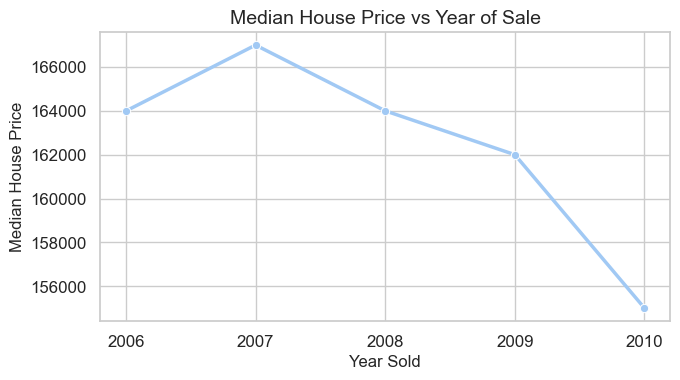

In [27]:
# Grouping and resetting index to use seaborn
yearly_price = dataset.groupby('YrSold')['SalePrice'].median().reset_index()

# Plotting with seaborn
plt.figure(figsize=(7, 4))
sns.lineplot(data=yearly_price, x='YrSold', y='SalePrice', marker='o', linewidth=2.5)

# Enhancing plot details
plt.xlabel('Year Sold', fontsize=12)
plt.ylabel('Median House Price', fontsize=12)
plt.title("Median House Price vs Year of Sale", fontsize=14)
plt.xticks(yearly_price['YrSold'].unique())  # Ensure all years appear on x-axis
plt.tight_layout()
plt.show()


In [20]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

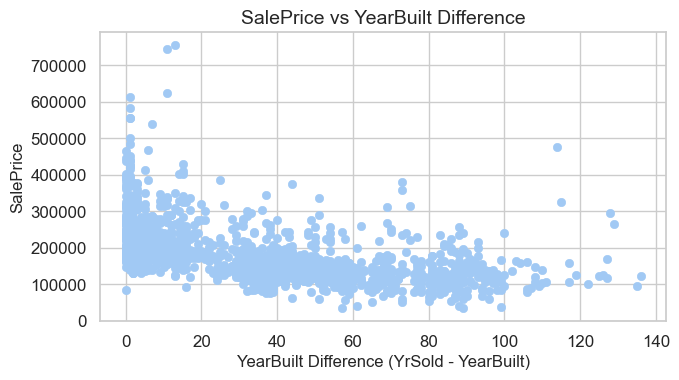

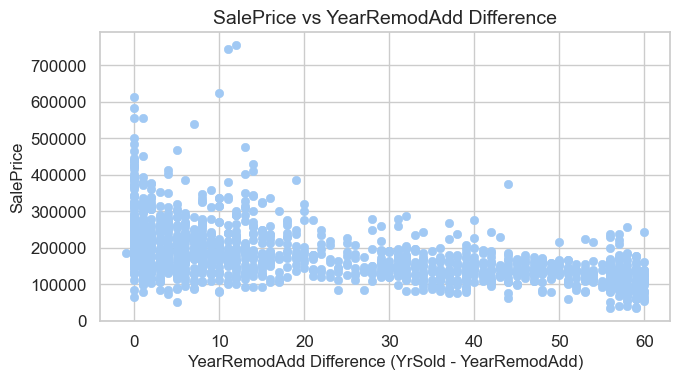

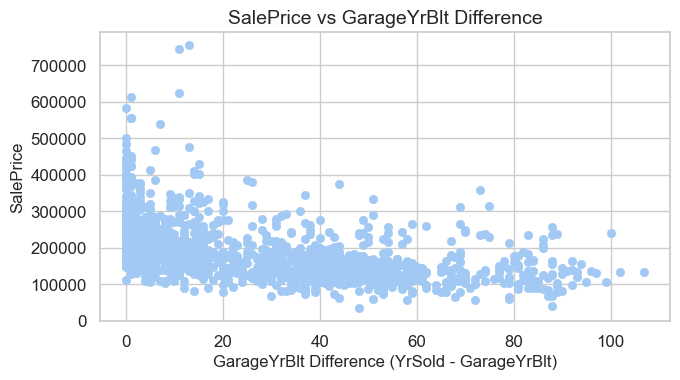

In [32]:
for feature in year_feature:
    if feature != 'YrSold':
        data = dataset.copy()

        # Difference between year feature and year the house was sold
        data[feature + '_diff'] = data['YrSold'] - data[feature]

        plt.figure(figsize=(7, 4))
        sns.scatterplot(data=data, x=feature + '_diff', y='SalePrice', edgecolor=None)

        plt.xlabel(f'{feature} Difference (YrSold - {feature})', fontsize=12)
        plt.ylabel('SalePrice', fontsize=12)
        plt.title(f'SalePrice vs {feature} Difference', fontsize=14)
        plt.tight_layout()
        plt.show()


In [34]:
# Numerical variables are usually of 2 type
# Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [35]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [36]:
dataset[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


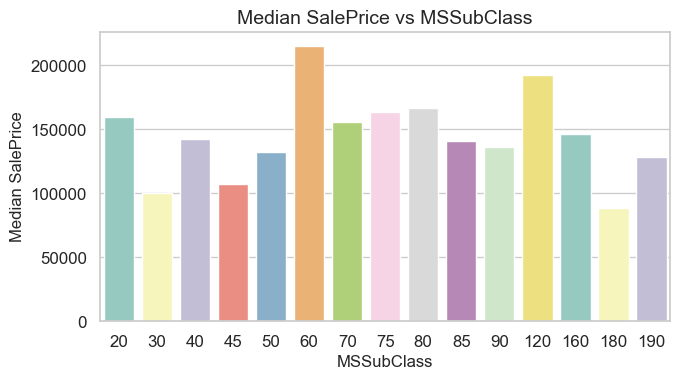

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


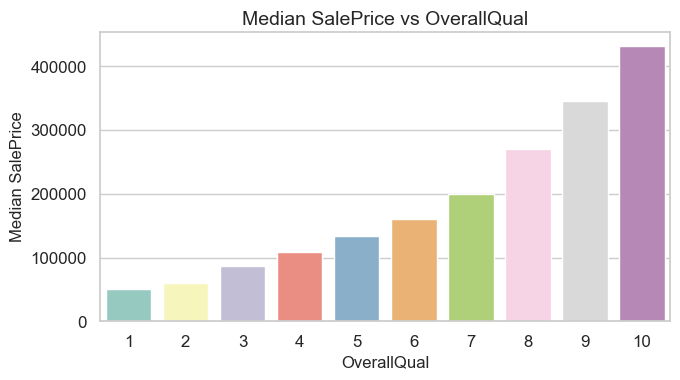

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


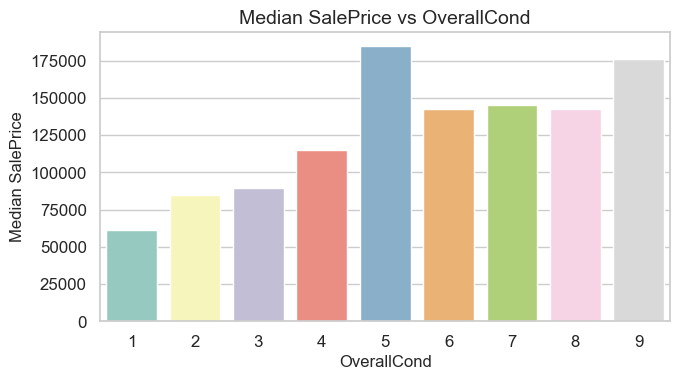

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


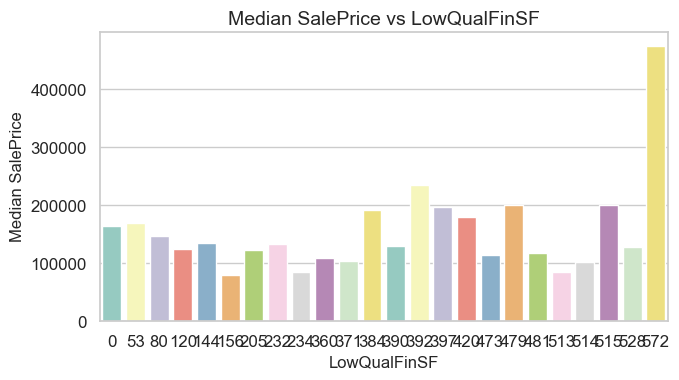

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


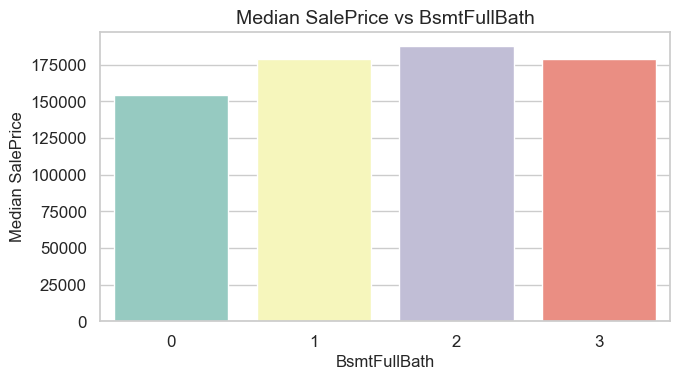

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


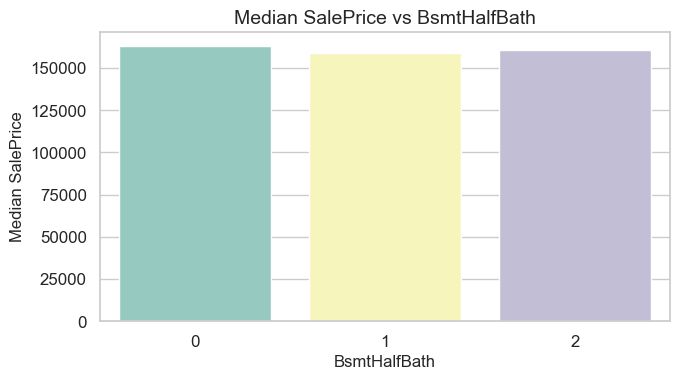

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


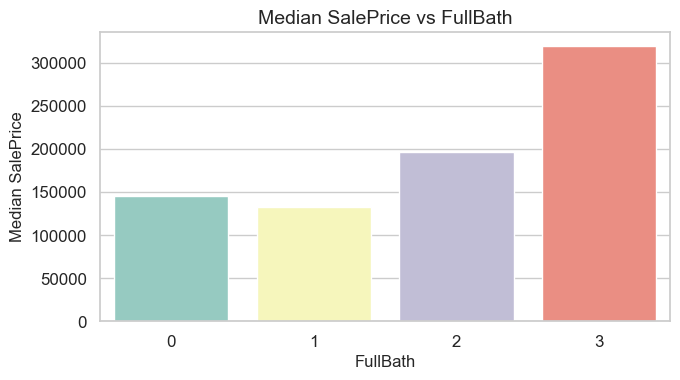

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


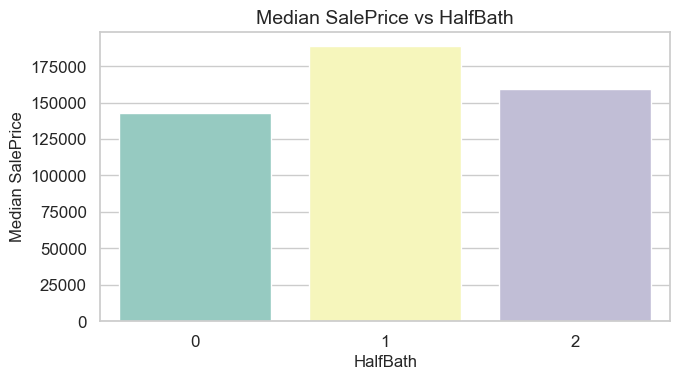

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


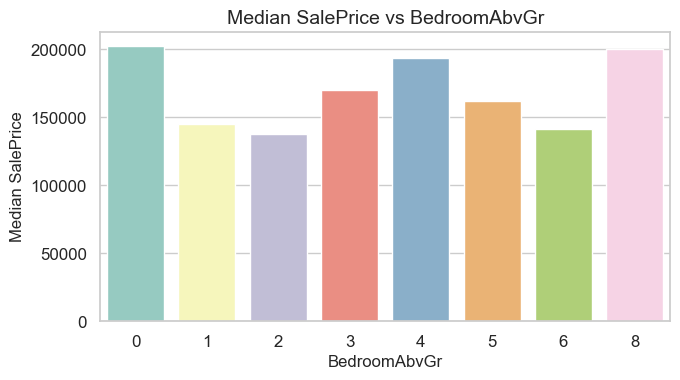

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


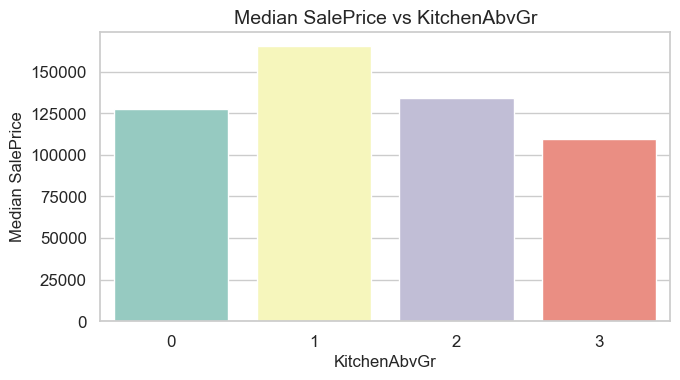

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


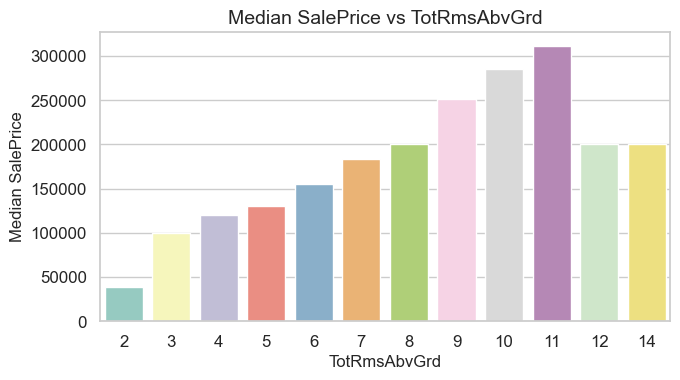

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


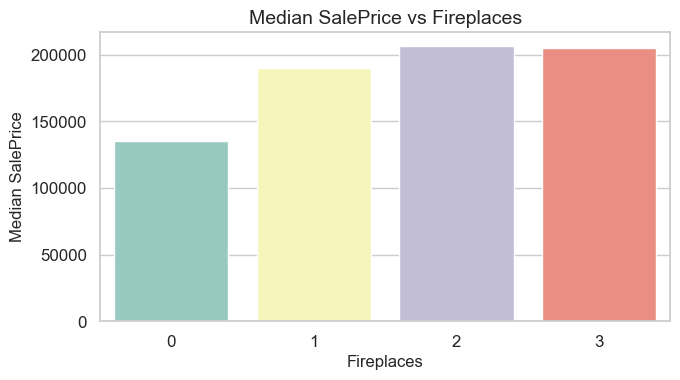

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


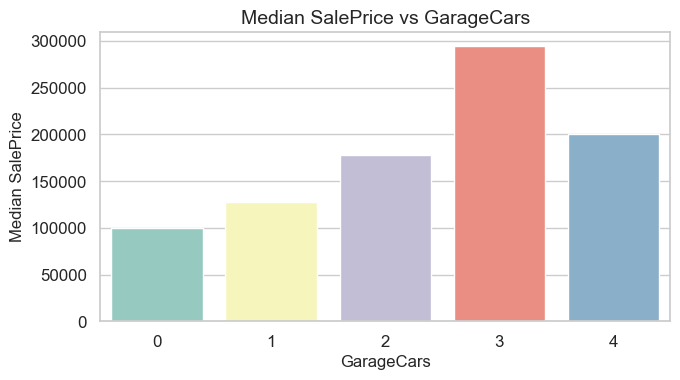

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


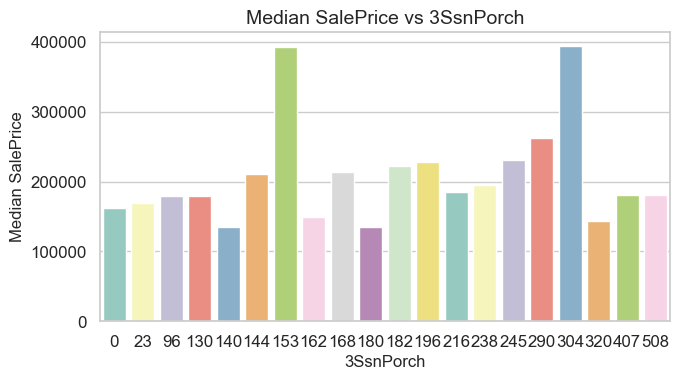

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


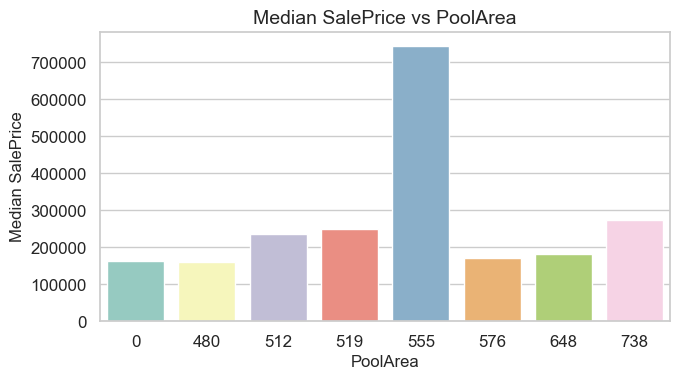

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


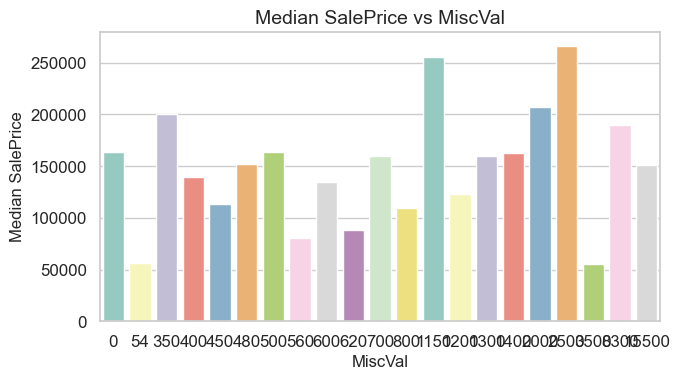

/var/folders/ds/_g9sbg5965v8vmdv78w424zm0000gn/T/ipykernel_25926/1526666699.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')


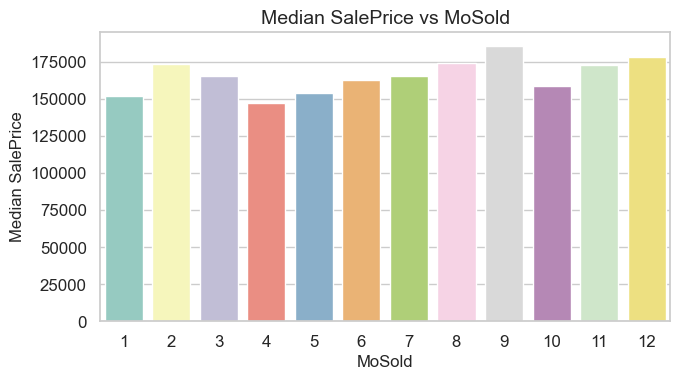

In [38]:
for feature in discrete_feature:
    data = dataset.copy()
    
    # Calculate median SalePrice for each category
    grouped = data.groupby(feature)['SalePrice'].median().reset_index()

    # Sort by feature value if it's numeric, else leave as is
    plt.figure(figsize=(7, 4))
    sns.barplot(data=grouped, x=feature, y='SalePrice', palette='Set3')

    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Median SalePrice', fontsize=12)
    plt.title(f'Median SalePrice vs {feature}', fontsize=14)

    plt.tight_layout()
    plt.show()


In [ ]:
# There is a relationship between variable number and SalePrice

#### Continuous Variable

In [40]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]   # Concatinating the list
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


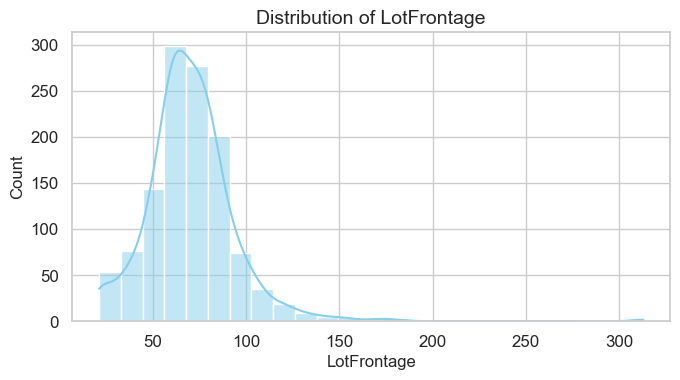

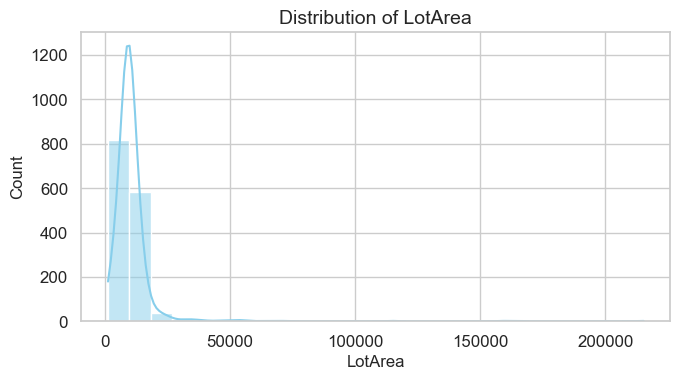

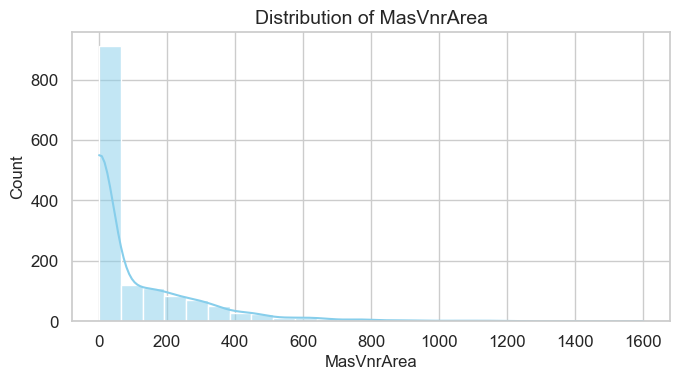

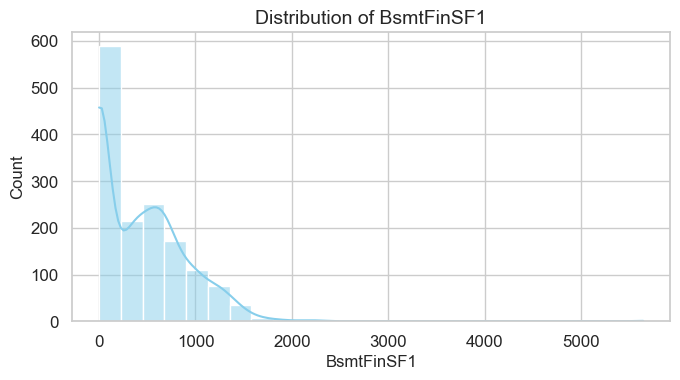

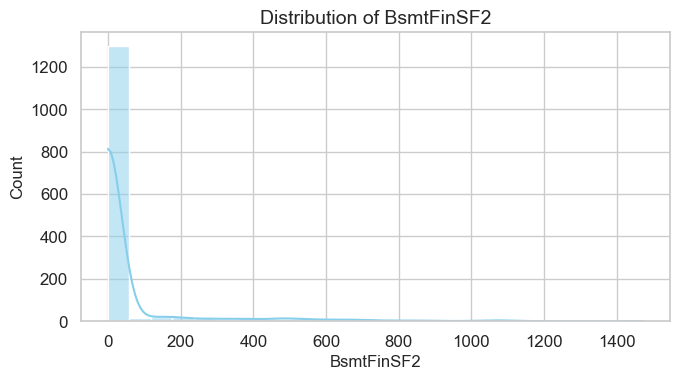

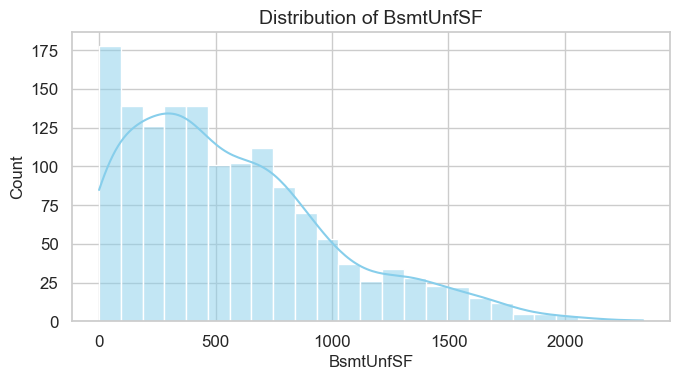

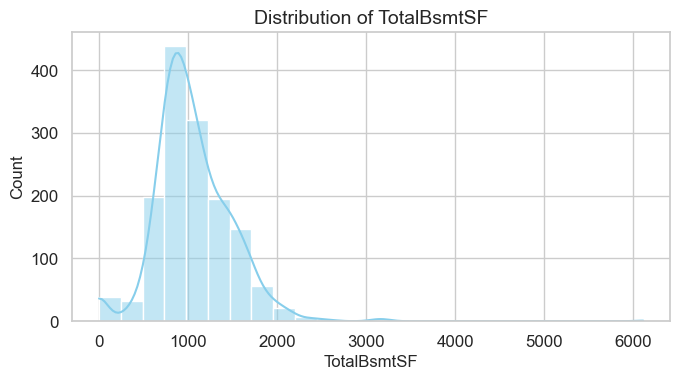

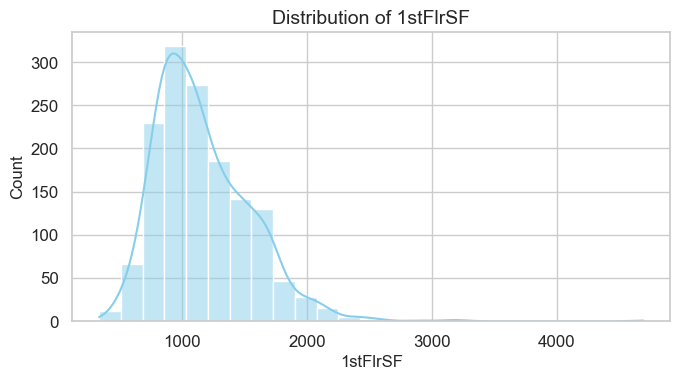

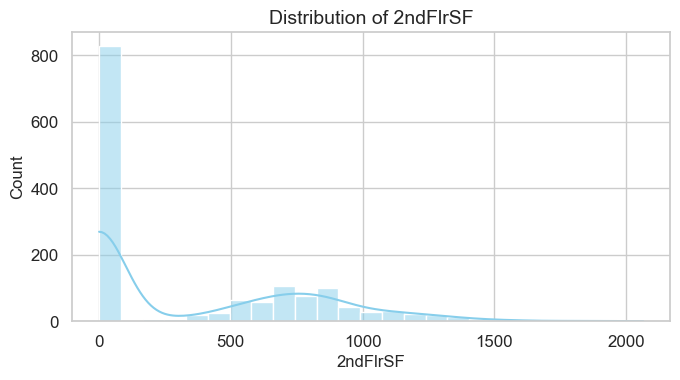

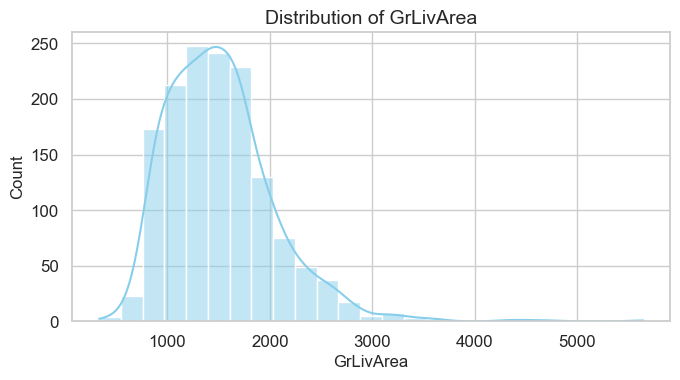

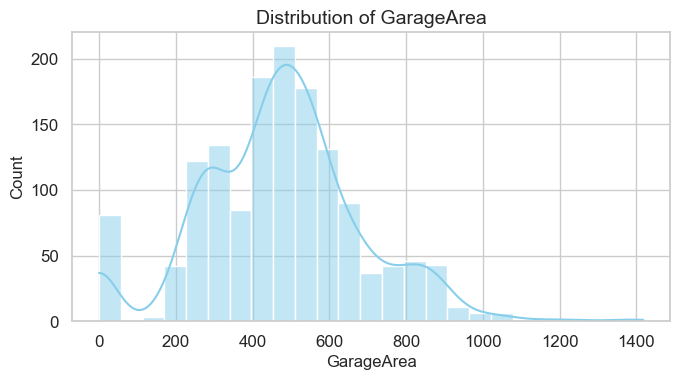

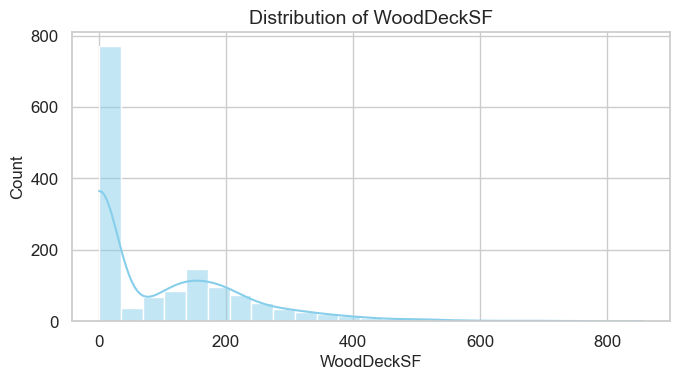

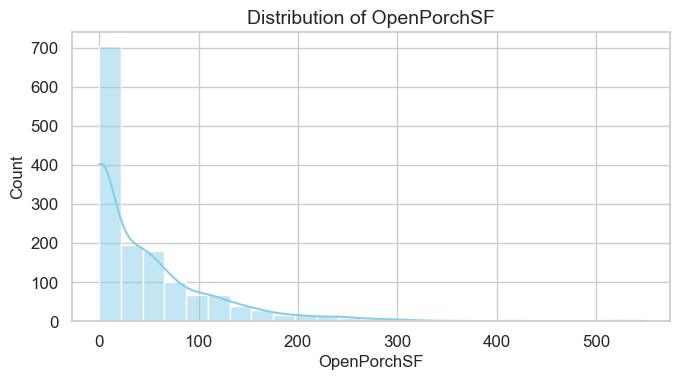

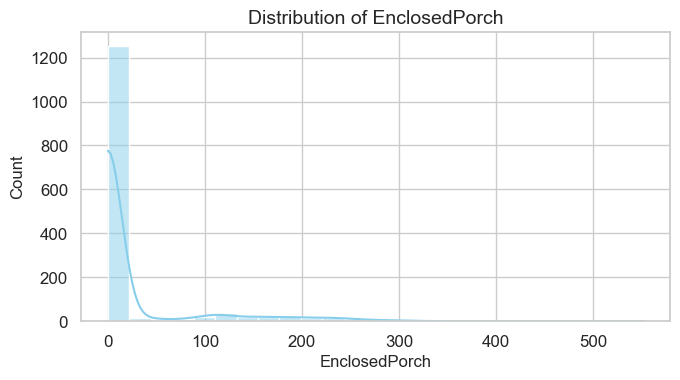

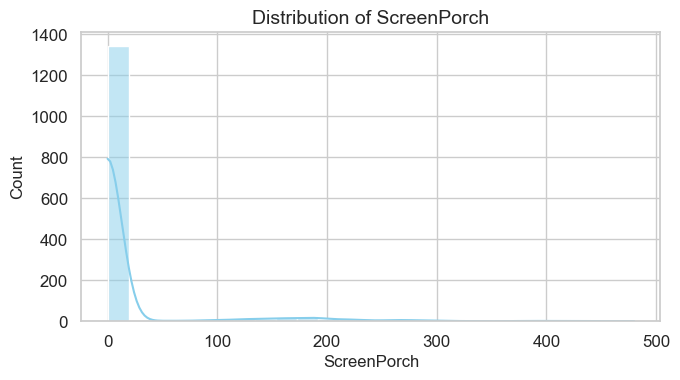

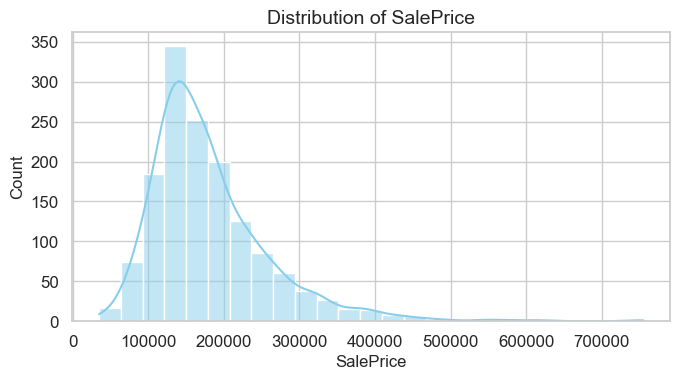

In [41]:
for feature in continuous_feature:
    data = dataset.copy()
    
    plt.figure(figsize=(7, 4))
    sns.histplot(data[feature], bins=25, kde=True, color='skyblue', edgecolor='white')

    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.tight_layout()
    plt.show()


In [ ]:
# Not all of them would have normal distribution, some of them are skewed data

### Exploratory Data Analysis Part 2

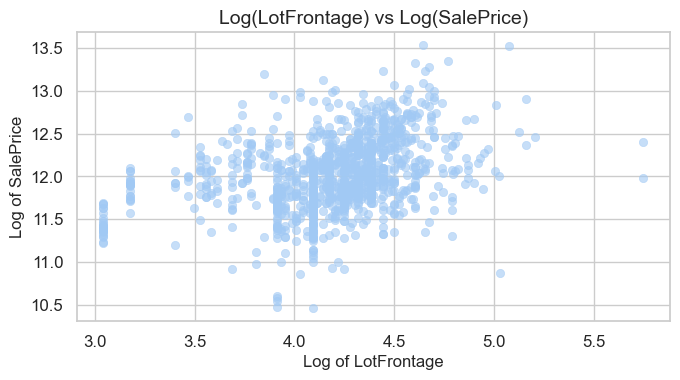

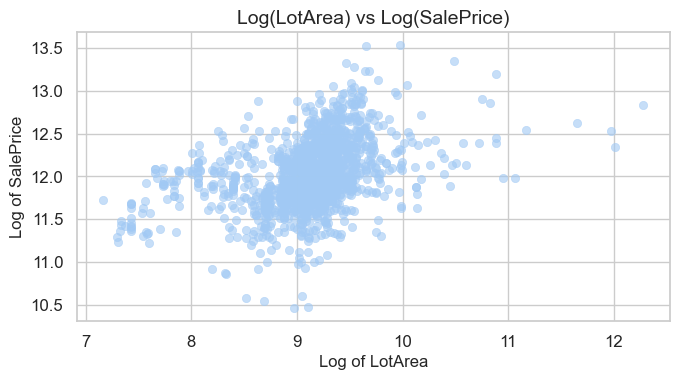

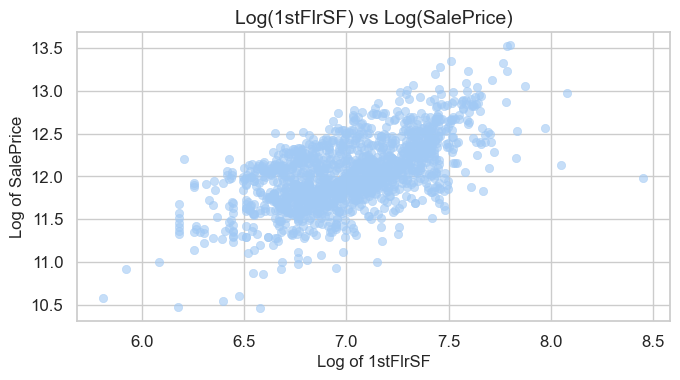

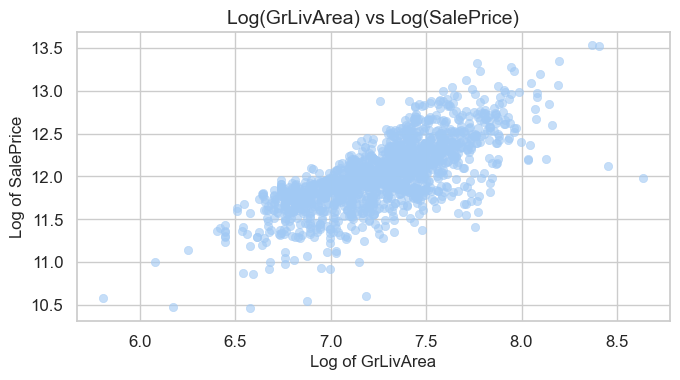

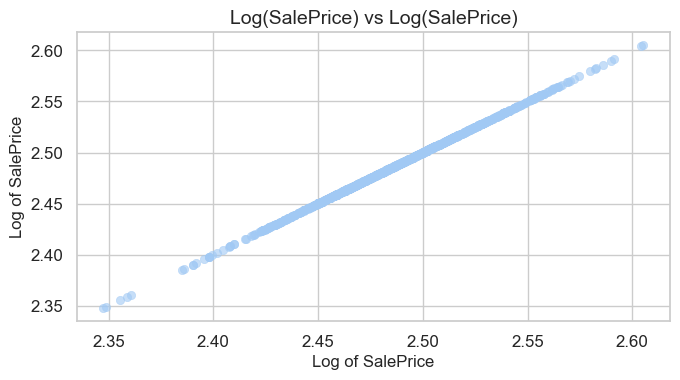

In [42]:
for feature in continuous_feature:
    data = dataset.copy()
    
    # Skip if 0 exists in the feature (log(0) is undefined)
    if 0 in data[feature].unique():
        continue
    else:
        # Apply log transformation
        data[feature] = np.log(data[feature])
        data['SalePrice'] = np.log(data['SalePrice'])

        # Seaborn scatterplot
        plt.figure(figsize=(7, 4))
        sns.scatterplot(data=data, x=feature, y='SalePrice', alpha=0.6, edgecolor=None)

        plt.xlabel(f'Log of {feature}', fontsize=12)
        plt.ylabel('Log of SalePrice', fontsize=12)
        plt.title(f'Log({feature}) vs Log(SalePrice)', fontsize=14)
        plt.tight_layout()
        plt.show()


### Outliers

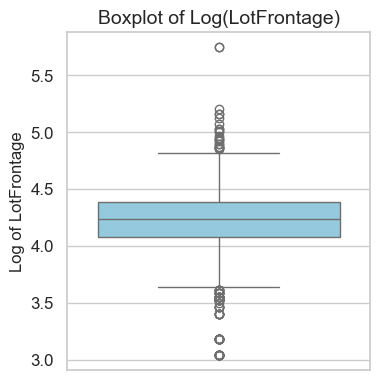

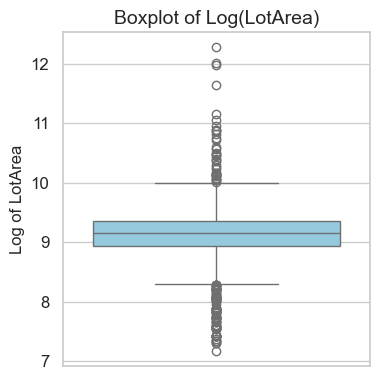

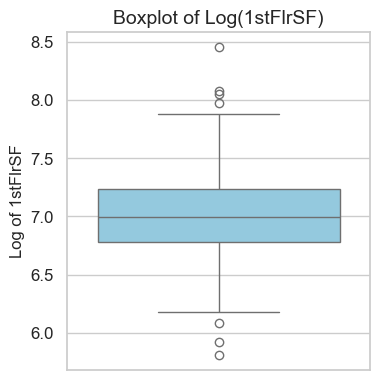

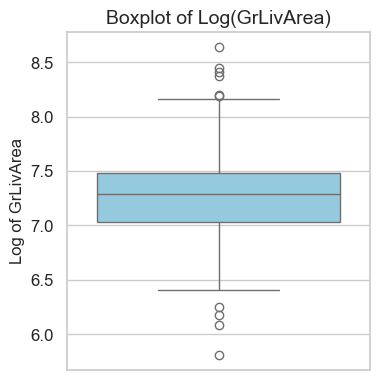

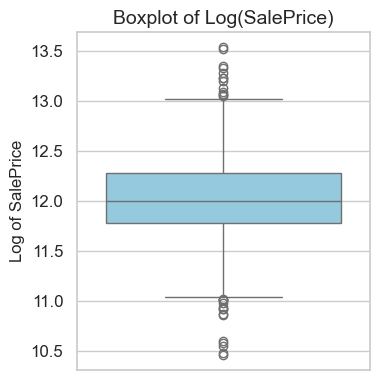

In [ ]:
for feature in continuous_feature:
    data = dataset.copy()
    
    # Skip features with 0 values to avoid log(0)
    if 0 in data[feature].unique():
        continue
    else:
        data[feature] = np.log(data[feature])

        plt.figure(figsize=(4, 4))
        sns.boxplot(y=data[feature], color='skyblue')

        plt.ylabel(f'Log of {feature}', fontsize=12)
        plt.title(f'Boxplot of Log({feature})', fontsize=14)
        plt.tight_layout()
        plt.show()

### Categorical Variables

In [ ]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 8
The feature is Exterior1st and number of categories are 15
The feature is Exterior2nd and number of categories are 16
The feature is MasVnrType and number of cate

In the above result: Neighborhod, Exterior1st, Exterior2nd have wide range of unique categories within themselves. 

In [ ]:
# Find out the relationship between categorical variable and dependent feature SalesPrice

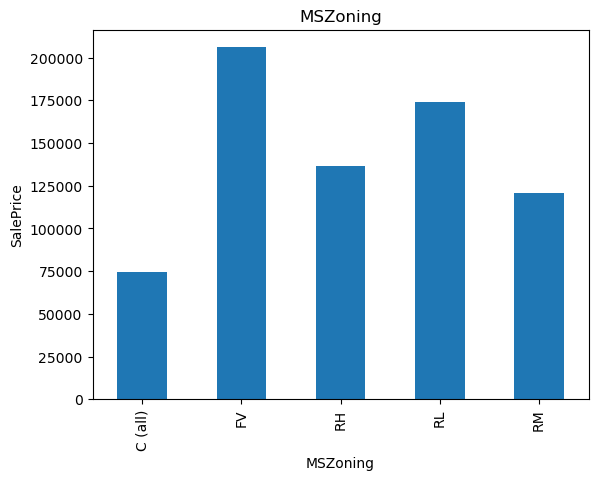

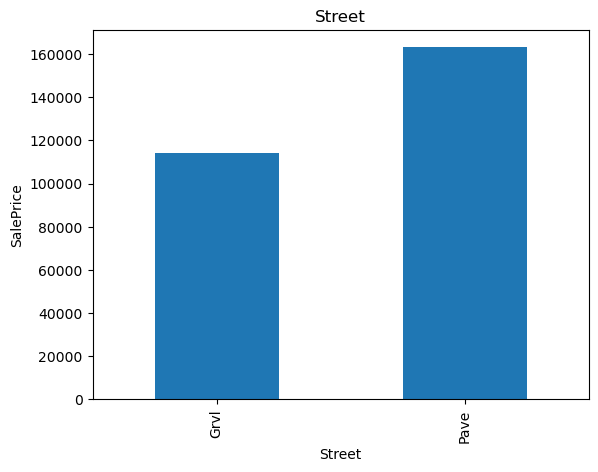

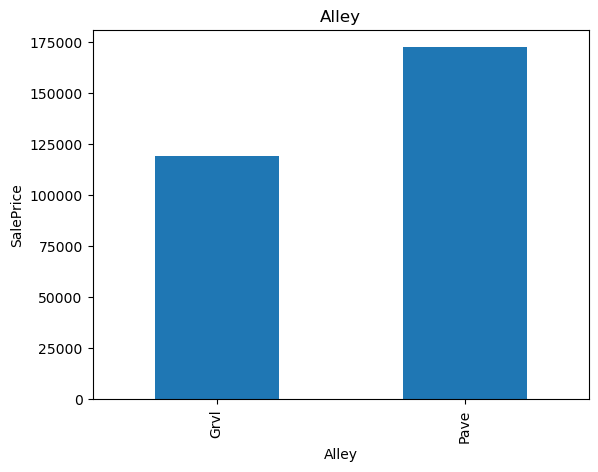

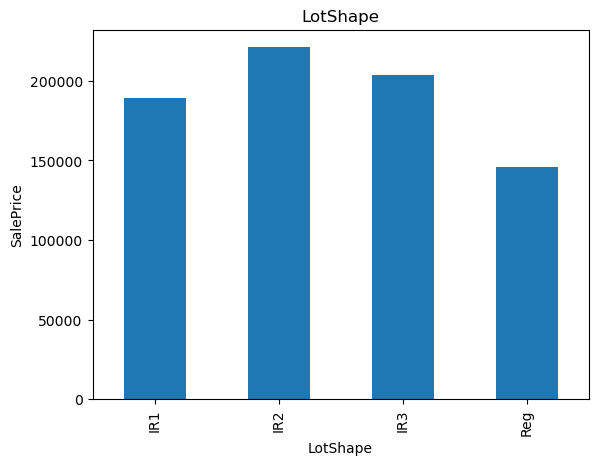

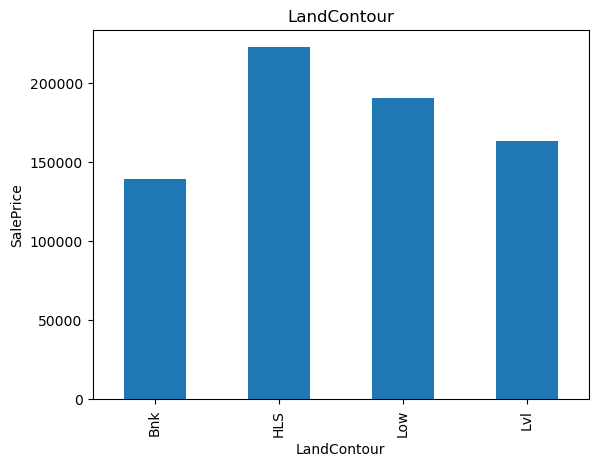

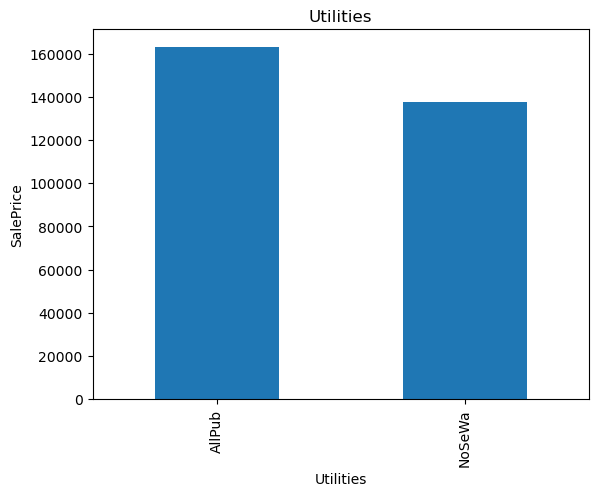

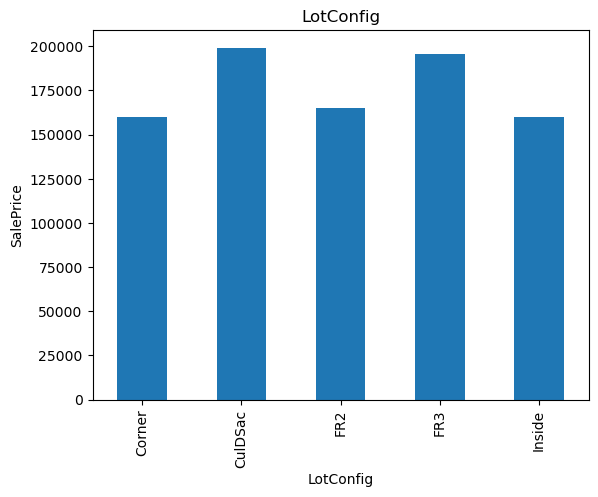

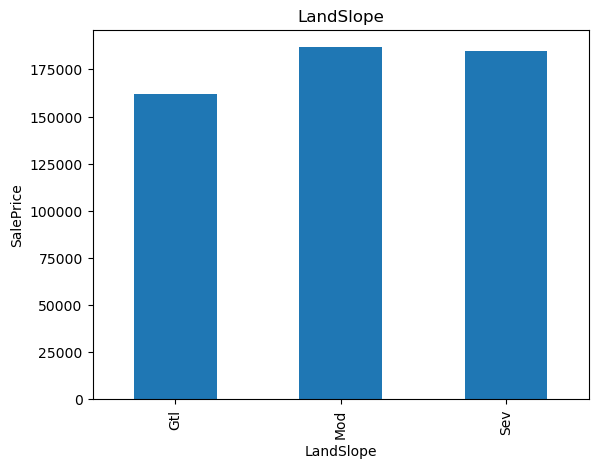

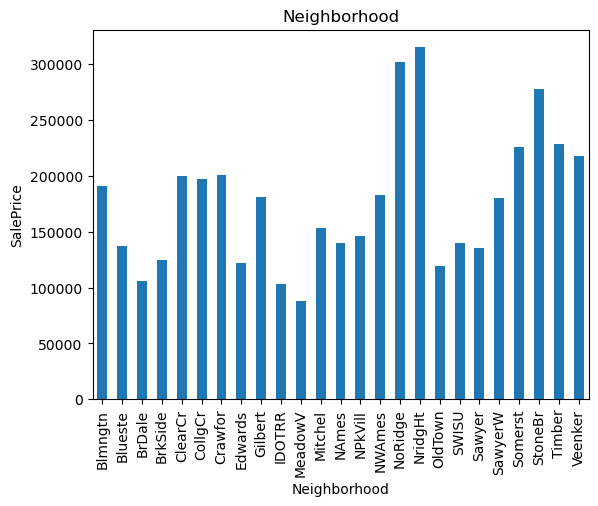

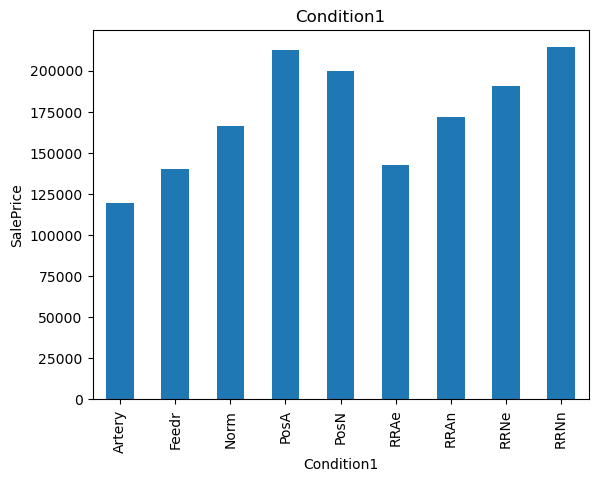

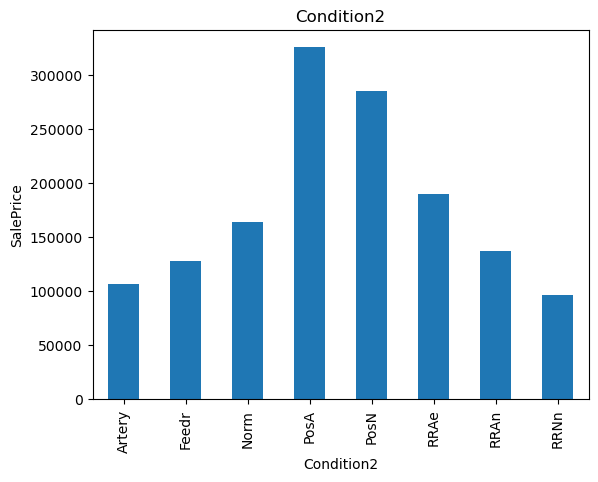

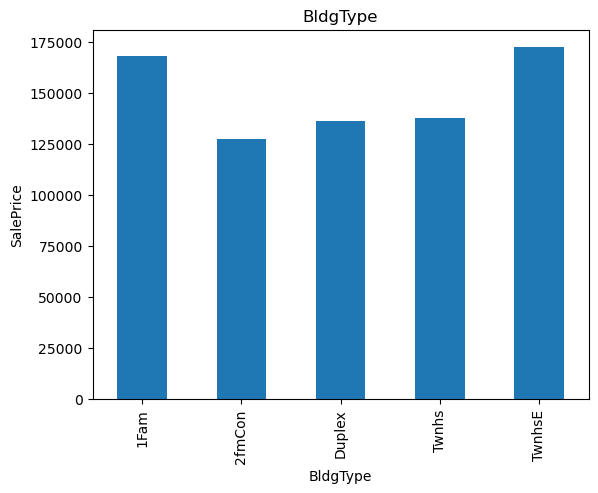

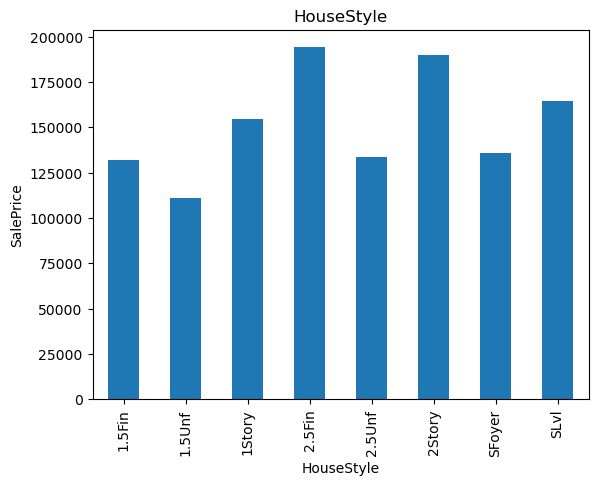

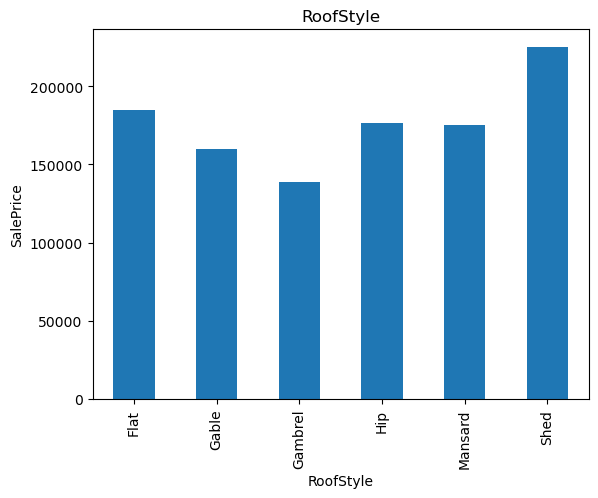

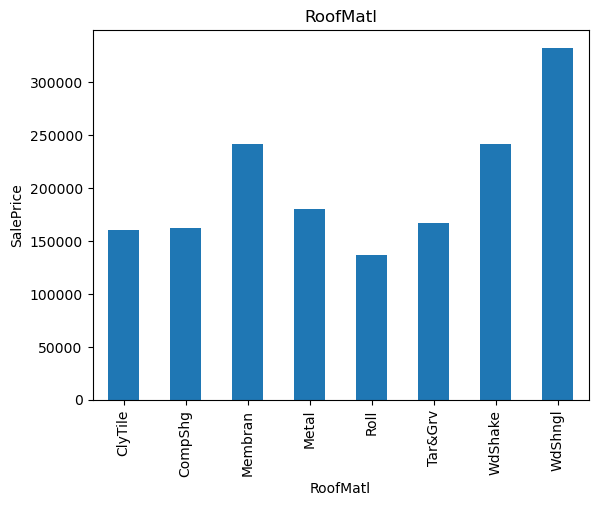

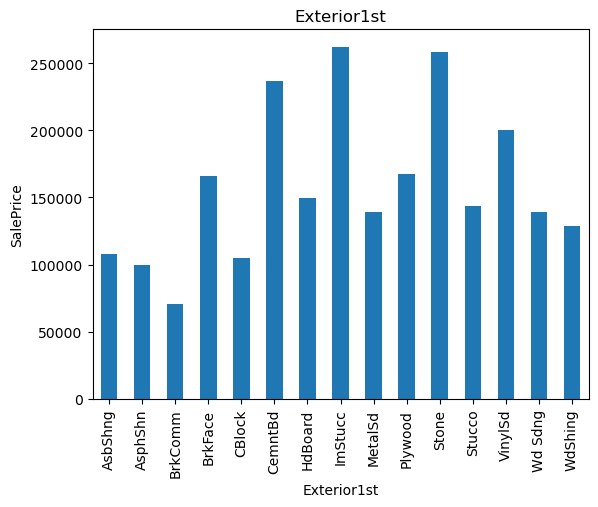

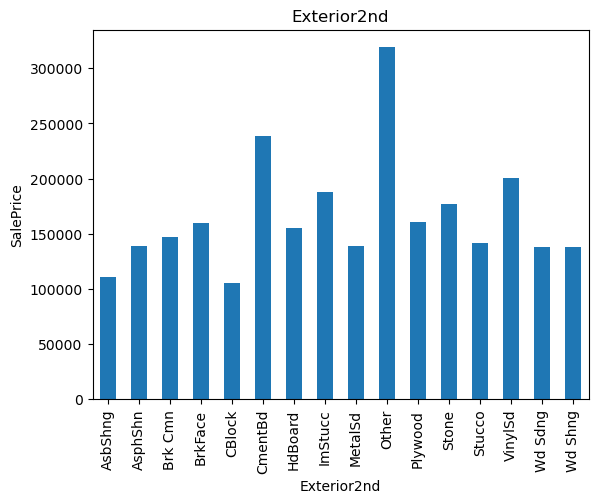

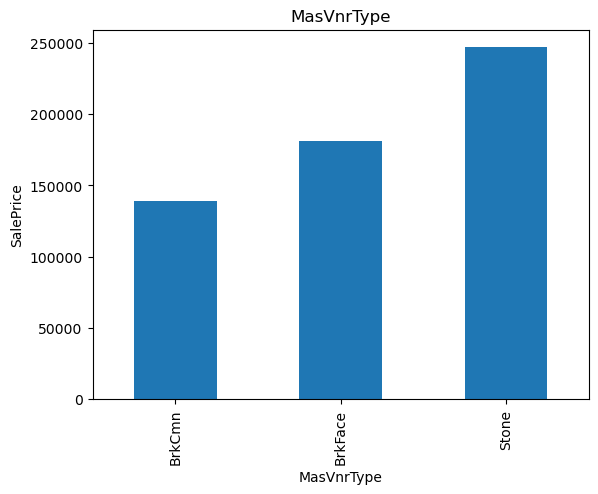

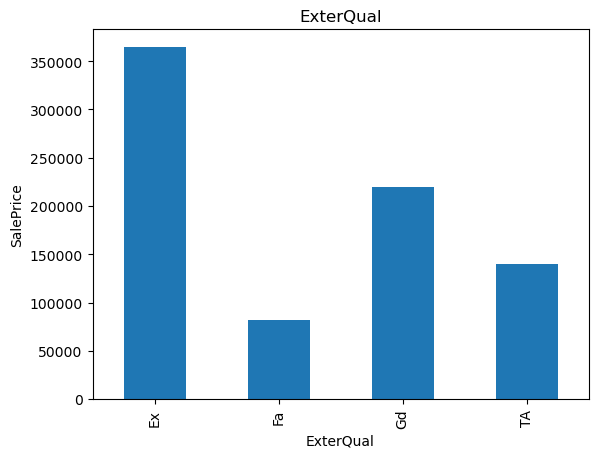

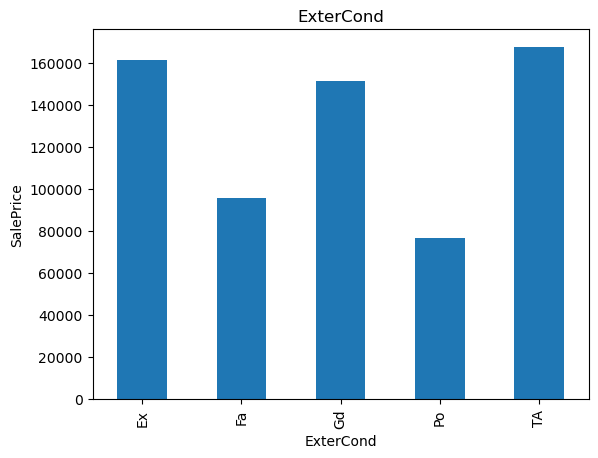

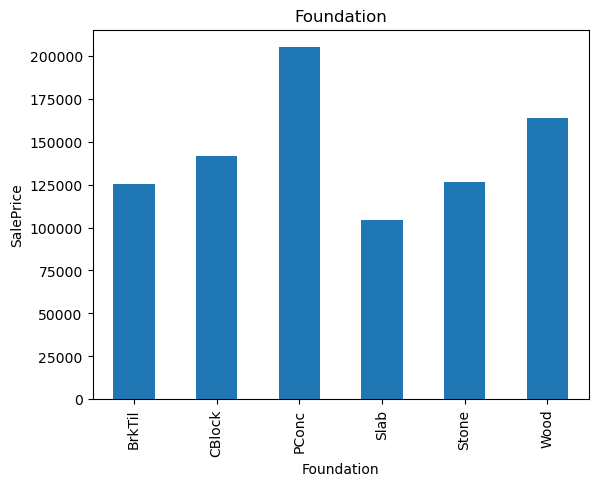

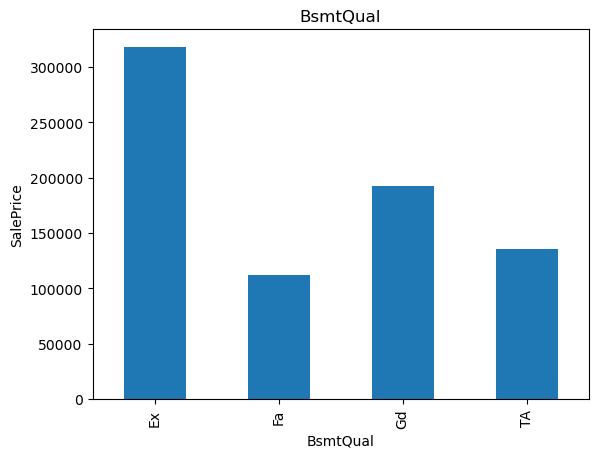

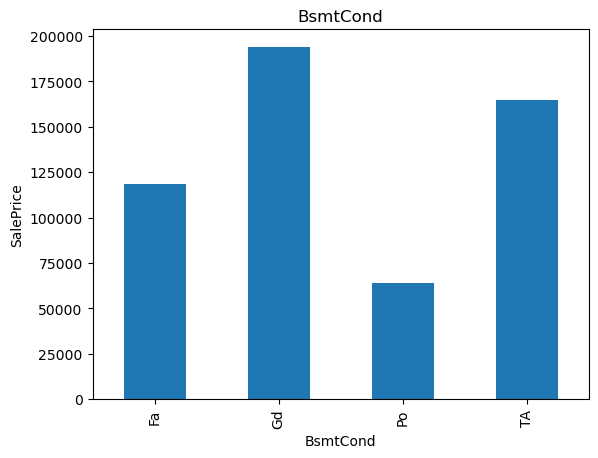

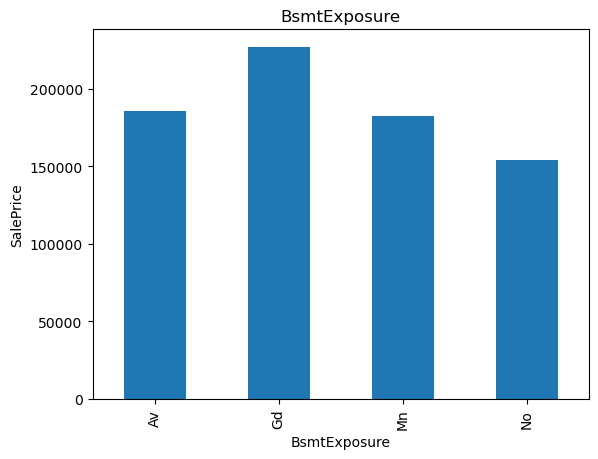

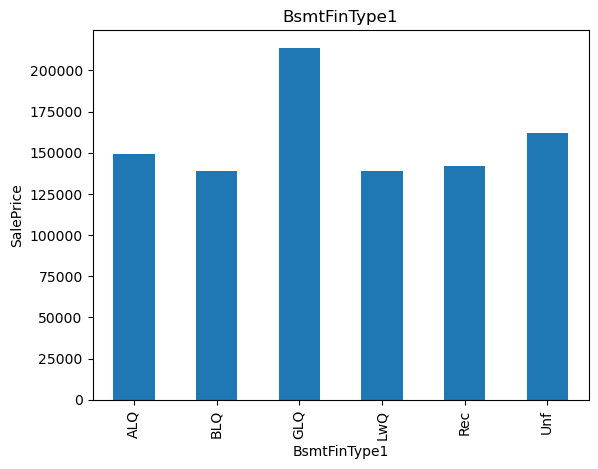

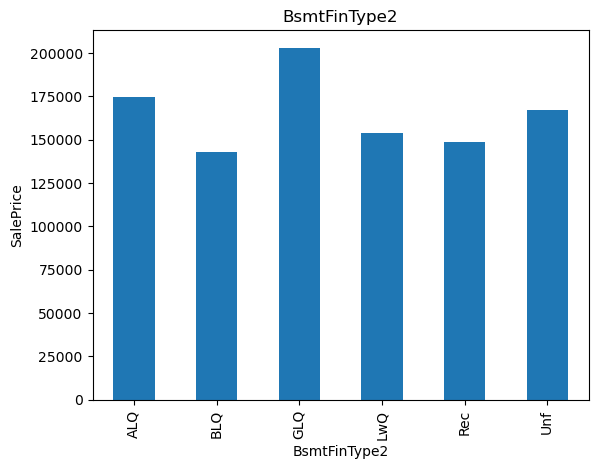

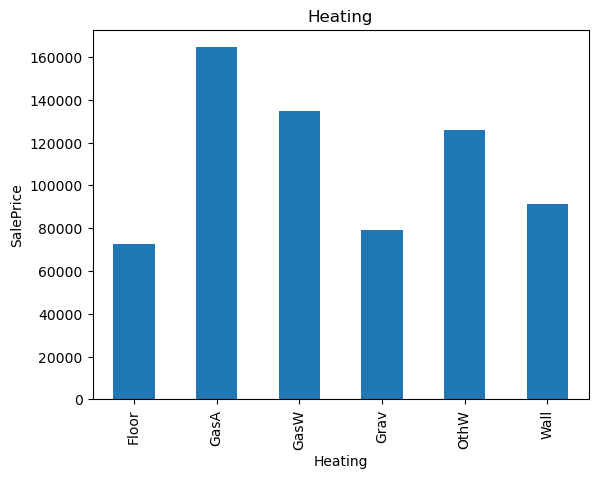

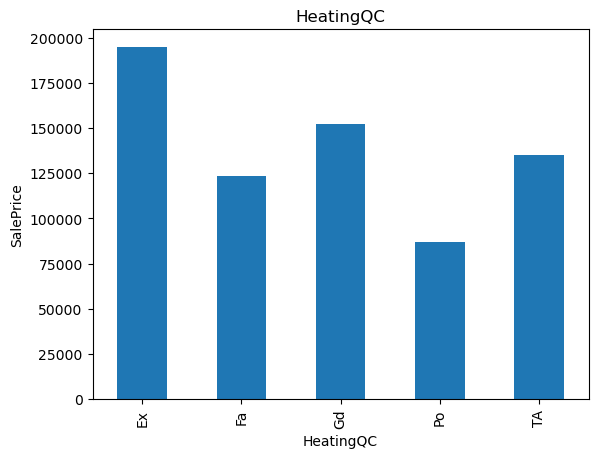

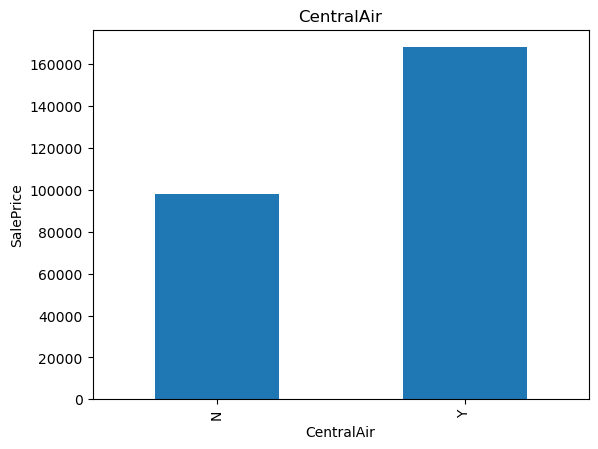

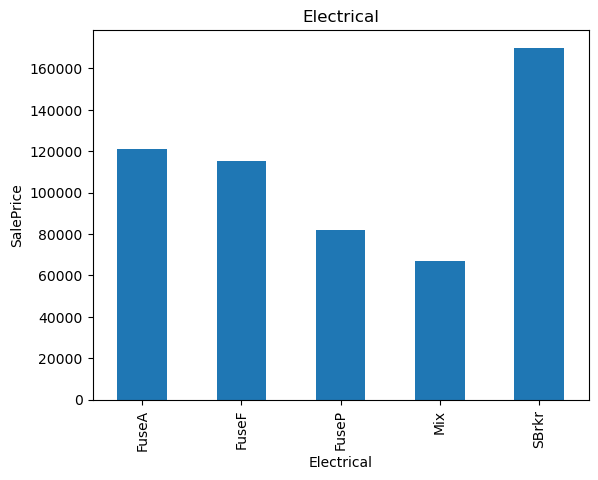

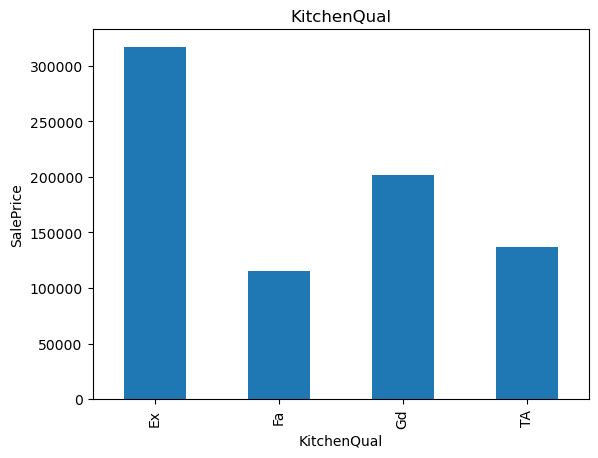

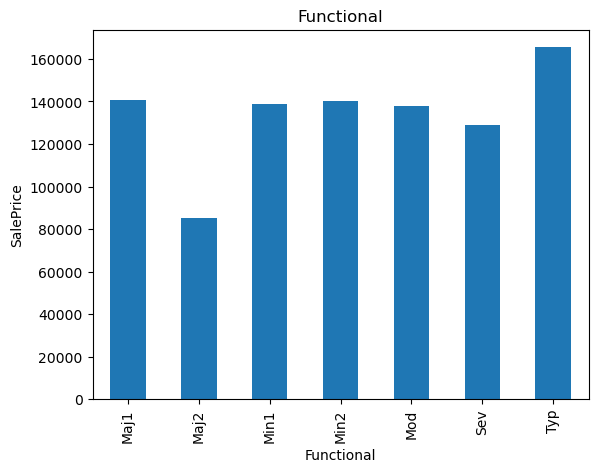

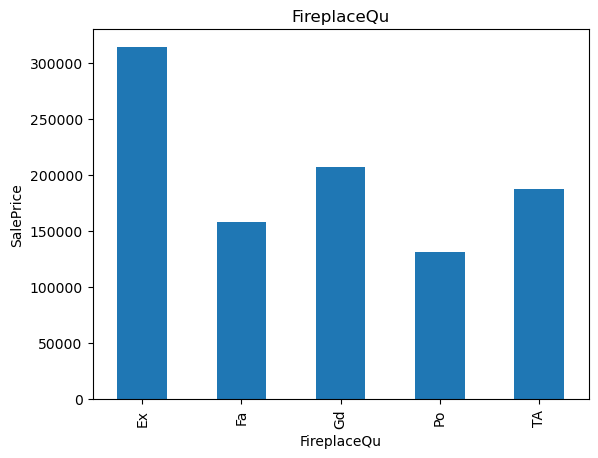

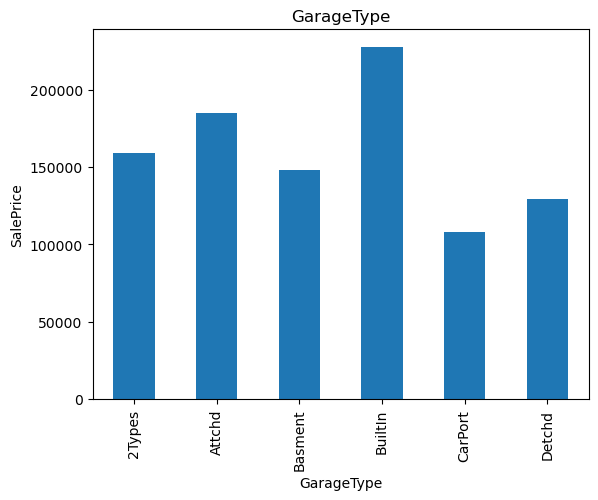

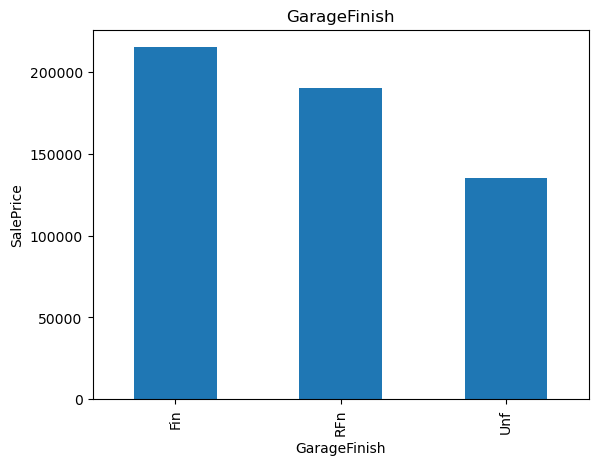

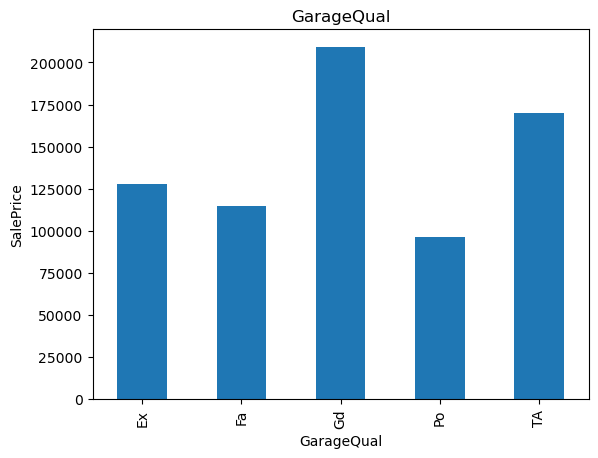

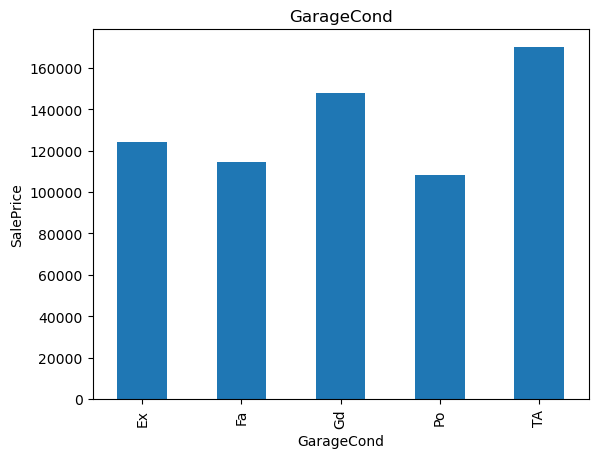

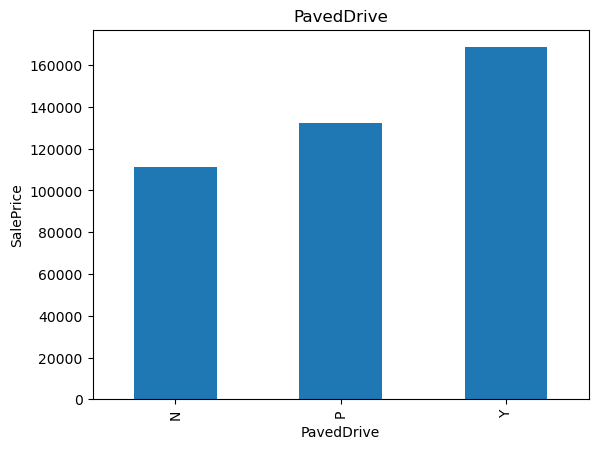

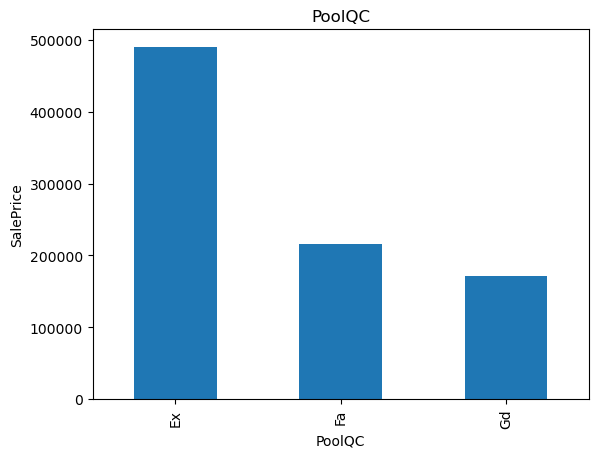

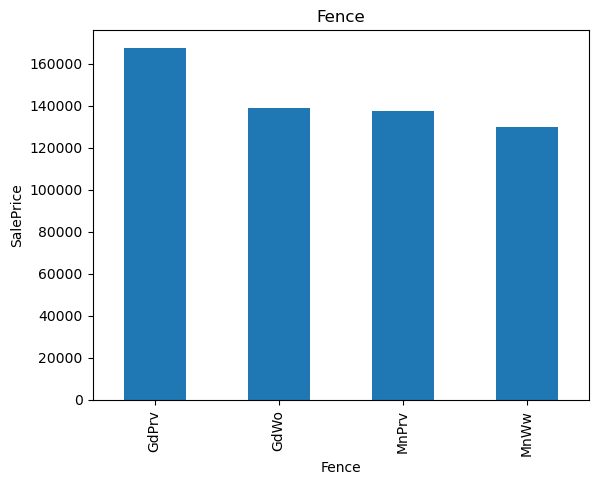

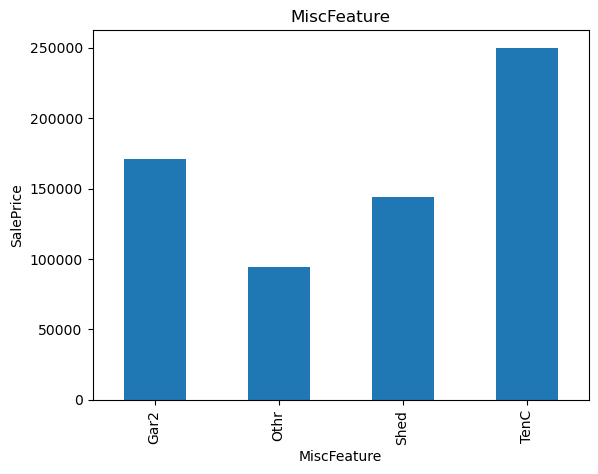

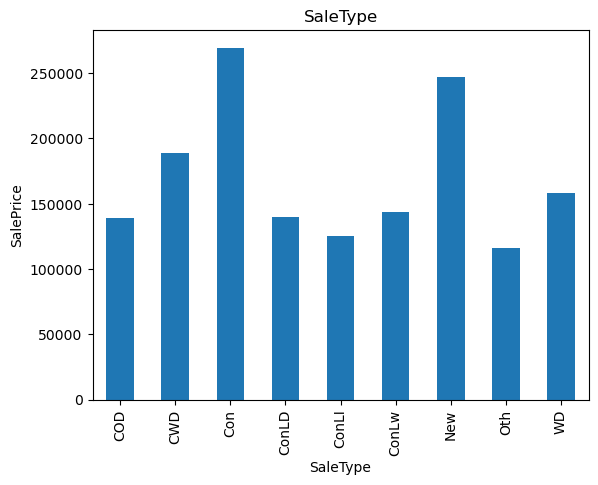

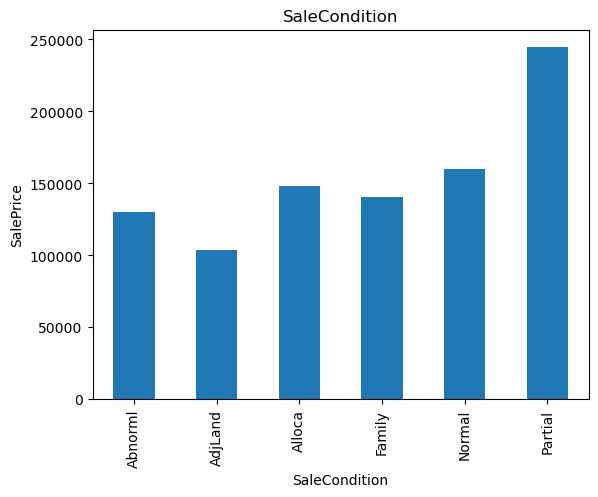

In [ ]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [11]:
# The above plots show the variation of Salesprice for each categorical features, unique features.